In [12]:
!pip3 install seaborn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [14]:
# Load the data from an example CSV file
data = pd.read_csv('./dataquest_fraud_train.csv')

# Converting transDate to datetime
data['transDate'] = pd.to_datetime(data['transDate'])

# Extracting year and month from the date for grouping
data['YearMonth'] = data['transDate'].dt.to_period('M')

df = pd.DataFrame(data)

In [15]:
data.head()

,transDate,creditCardNum,business,category,amount,firstName,lastName,gender,street,city,...,longitude,cityPop,job,dateOfBirth,transNum,unixTime,merchLatitude,merchLongitude,isFraud,YearMonth
0,2019-01-01 04:28:00,4119762878330980,fraud_Welch Inc,misc_net,4.10,Melinda,Gutierrez,F,1497 West Gateway,Eureka,...,-89.2706,6713,Archivist,1945-08-19,3fc1791ff1db94ce9540262d7eb973e4,1325392080,40.020043,-89.693412,0,2019-01
1,2019-01-01 04:28:00,36078114201167,fraud_Auer-West,shopping_net,2.67,Christopher,Horn,M,956 Sanchez Highway,Mallie,...,-82.9161,798,Facilities manager,1926-06-26,edbf65b8606b53fc48168c2daa5933e5,1325392095,37.622362,-82.676007,0,2019-01
2,2019-01-01 04:29:00,4449530933957320,fraud_Balistreri-Nader,misc_pos,22.88,Felicia,Mckee,F,84079 Thomas Burgs,Tomales,...,-122.9145,337,Occupational psychologist,1954-07-05,2fcbde131cff833751dde53da54da6da,1325392154,39.060101,-121.969417,0,2019-01
3,2019-01-01 04:29:00,4302475216404890,"fraud_Boehm, Predovic and Reinger",misc_pos,9.59,Daniel,Cain,M,384 Newman Forks Apt. 370,Belmond,...,-93.6200,3032,Community pharmacist,1964-08-08,bcae564f9a1a299dfbd1efd917499968,1325392158,43.280848,-94.340312,0,2019-01
4,2019-01-01 04:32:00,377234009633447,fraud_Hudson-Ratke,grocery_pos,129.06,Theresa,Blackwell,F,43576 Kristina Islands,Shenandoah Junction,...,-77.8229,1925,Systems developer,1966-02-14,5e42e35c255edb55a192b3f1f0600936,1325392329,39.211630,-78.409044,0,2019-01


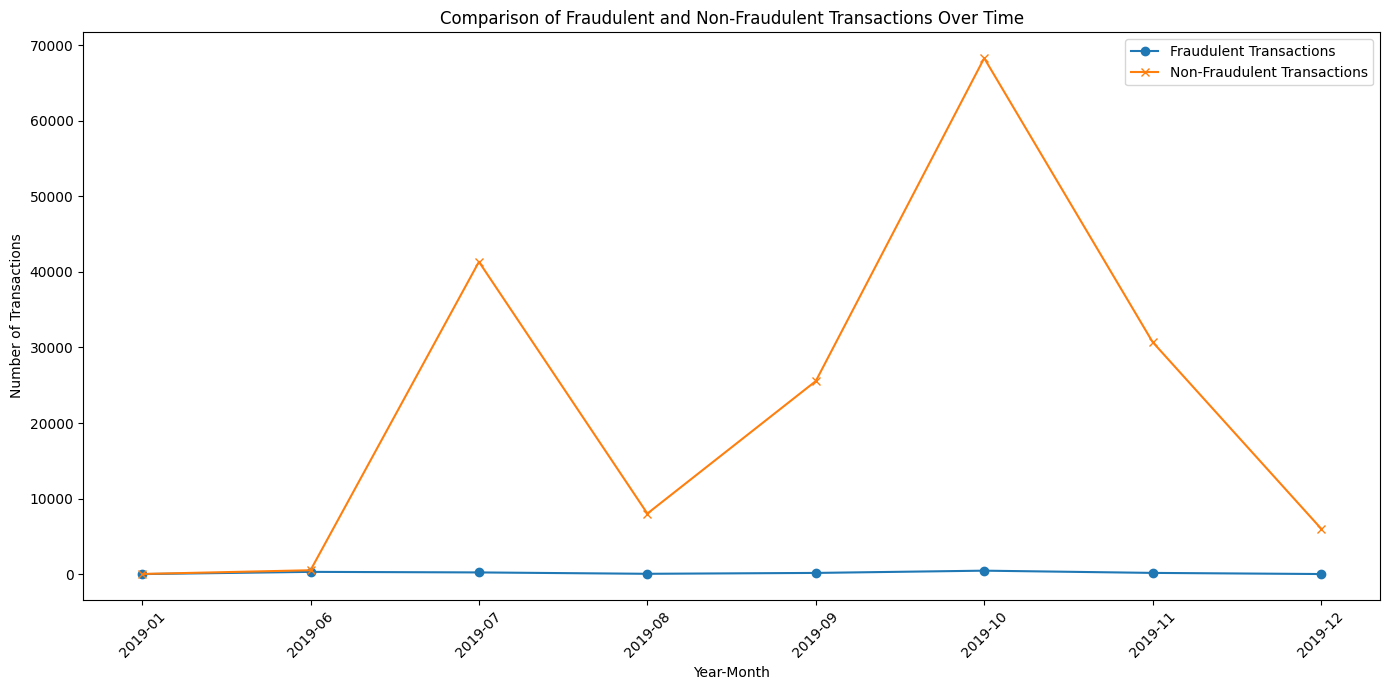

In [16]:
# Converting transDate to datetime
data['transDate'] = pd.to_datetime(data['transDate'])

# Extracting year and month from the date for grouping
data['YearMonth'] = data['transDate'].dt.to_period('M')

# Calculating the number of fraudulent and non-fraudulent transactions per month
fraud_trends = data.groupby(['YearMonth', 'isFraud']).size().unstack(fill_value=0)

# Resetting the index to have YearMonth as a column
fraud_trends.reset_index(inplace=True)

# Renaming columns for clarity
fraud_trends.columns = ['YearMonth', 'NotFraud', 'Fraud']

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(fraud_trends['YearMonth'].astype(str), fraud_trends['Fraud'], marker='o', label='Fraudulent Transactions')
plt.plot(fraud_trends['YearMonth'].astype(str), fraud_trends['NotFraud'], marker='x', label='Non-Fraudulent Transactions')
plt.title('Comparison of Fraudulent and Non-Fraudulent Transactions Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()



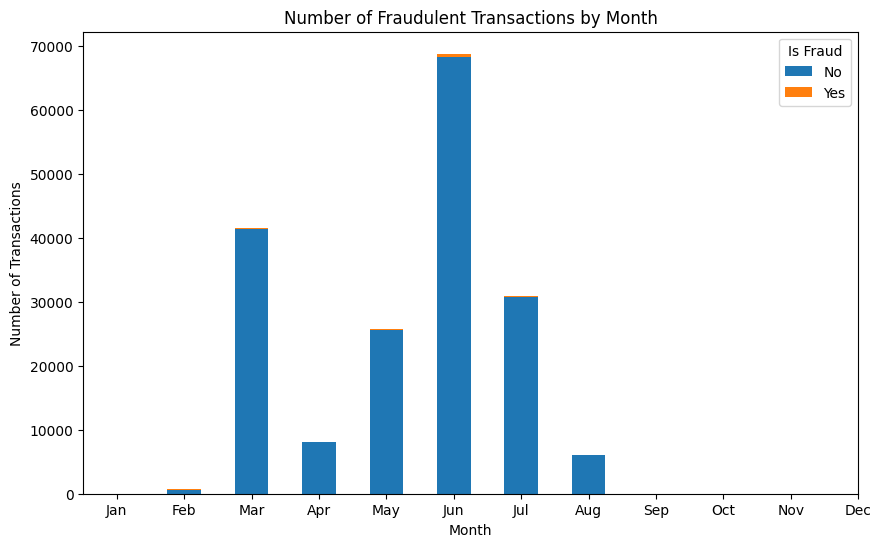

In [17]:
# Calculating the number of fraudulent and non-fraudulent transactions per month
fraud_trends = data.groupby(['YearMonth', 'isFraud']).size().unstack(fill_value=0)

# Resetting the index to have YearMonth as a column
fraud_trends.reset_index(inplace=True)

# Renaming columns for clarity
fraud_trends.columns = ['YearMonth', 'NotFraud', 'Fraud']

fraud_by_month = df.groupby([df['transDate'].dt.month, 'isFraud']).size().unstack(fill_value=0)

# Plot
fraud_by_month.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(title='Is Fraud', labels=['No', 'Yes'])
plt.show()

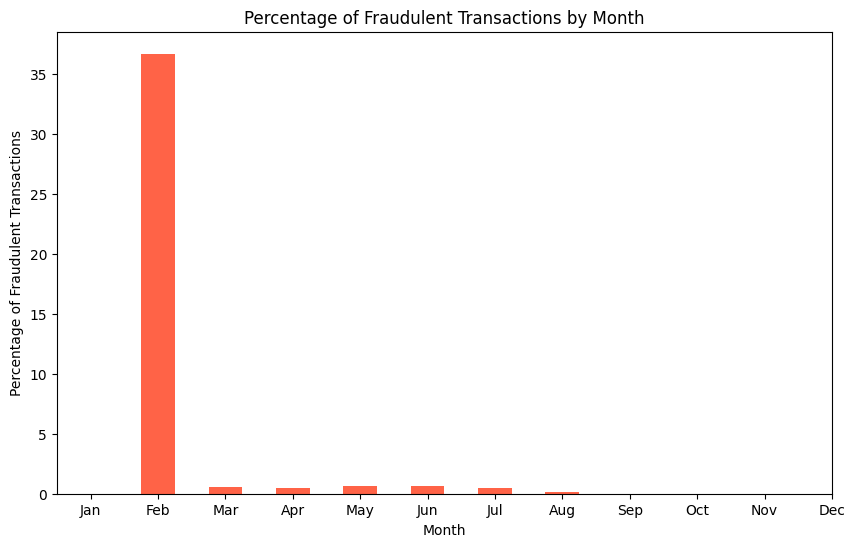

In [18]:
# Calculate the percentage of fraudulent transactions by month
fraud_percent_by_month = (fraud_by_month[1] / (fraud_by_month[0] + fraud_by_month[1])) * 100

# Plot
fraud_percent_by_month.plot(kind='bar', figsize=(10,6), color='tomato')
plt.title('Percentage of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Percentage of Fraudulent Transactions')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.show()

In [19]:
fraud_counts_by_business

isFraud,0,1,FraudRatio
business,,,
Abbott-Rogahn,242,1,0.411523
Abshire PLC,252,2,0.787402
"Adams, Kovacek and Kuhlman",123,1,0.806452
"Altenwerth, Cartwright and Koss",244,3,1.214575
Altenwerth-Kilback,348,1,0.286533
...,...,...,...
"Zboncak, Rowe and Murazik",251,1,0.396825
Zemlak Group,191,1,0.520833
Ziemann-Waters,217,1,0.458716


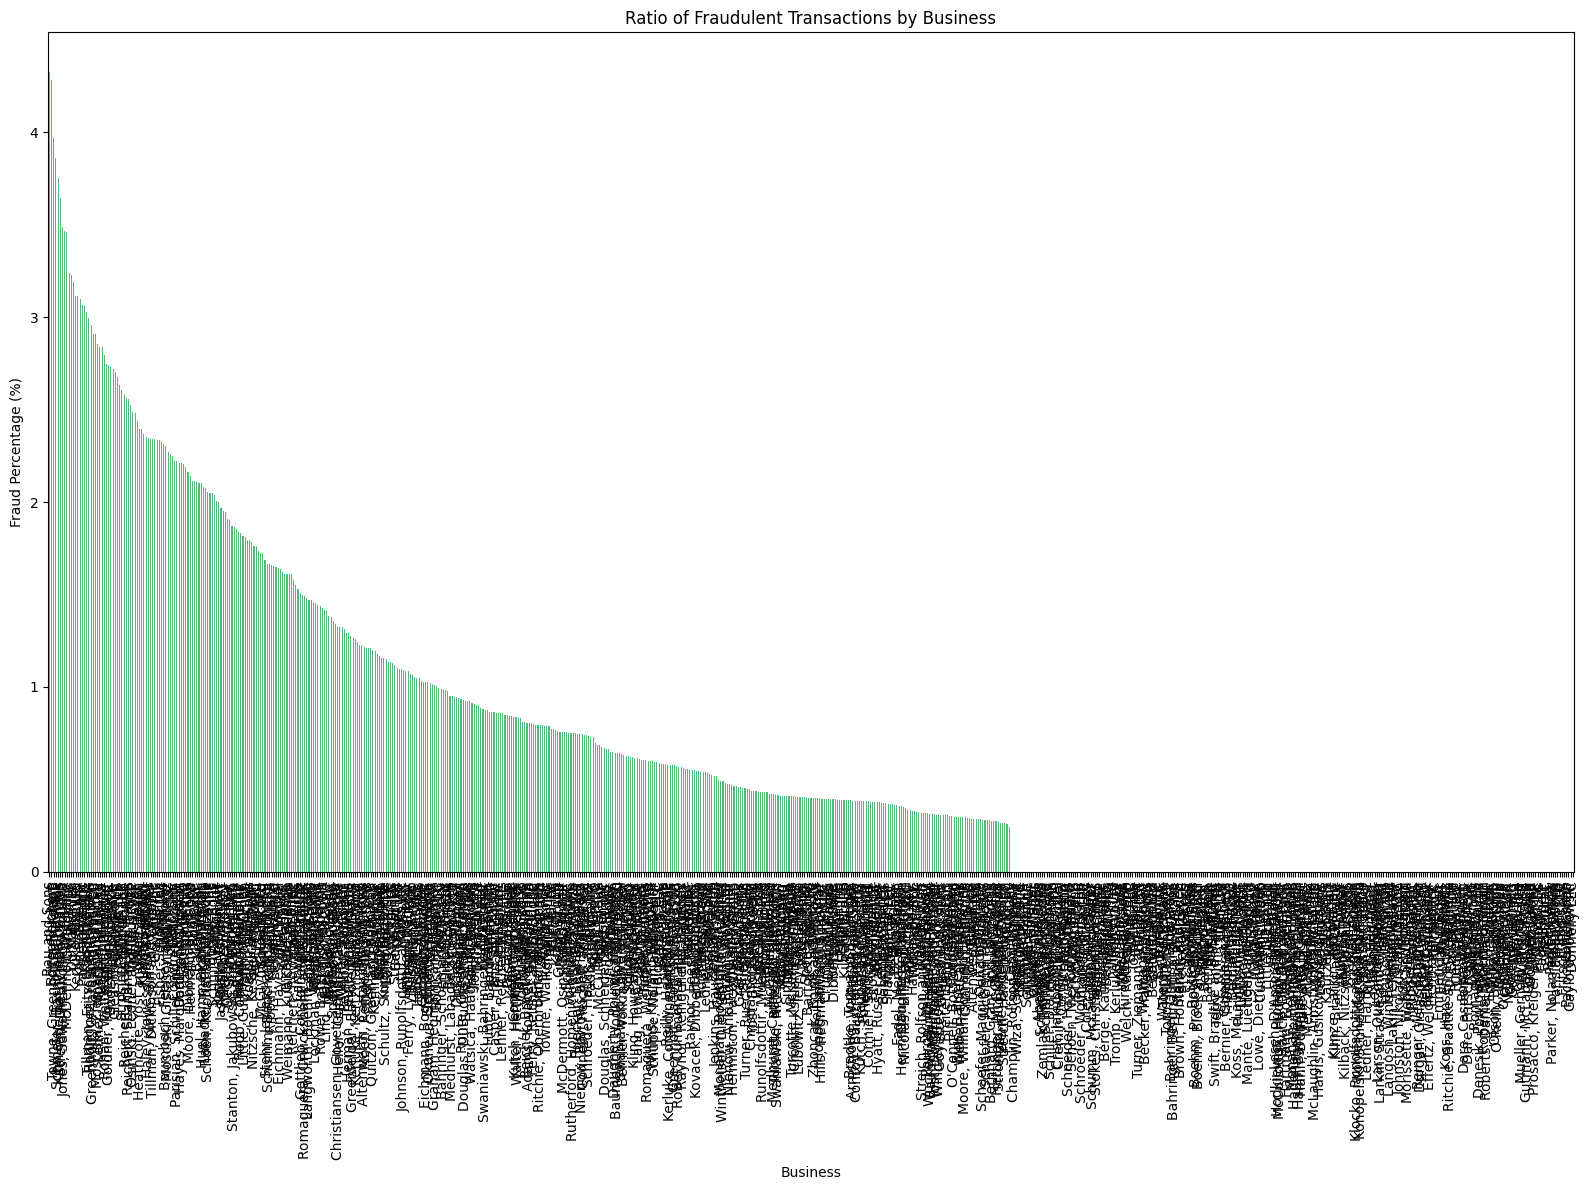

In [47]:
df['business'] = df['business'].str.replace('fraud_', '')

# Group by 'business' and 'isFraud' and calculate the count
fraud_counts_by_business = df.groupby(['business', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each business
fraud_counts_by_business['FraudRatio'] = fraud_counts_by_business[1] / (fraud_counts_by_business[0] + fraud_counts_by_business[1]) * 100

# Drop businesses with a FraudRatio of 0
# fraud_counts_by_business = fraud_counts_by_business[fraud_counts_by_business['FraudRatio'] > 0]

# Sort the businesses by fraud ratio
sorted_businesses = fraud_counts_by_business.sort_values('FraudRatio', ascending=False)

# Plot the sorted ratios
plt.figure(figsize=(16, 12))
sorted_businesses['FraudRatio'].plot(kind='bar', color='#52b878')
plt.title('Ratio of Fraudulent Transactions by Business')
plt.xlabel('Business')
plt.ylabel('Fraud Percentage (%)')
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

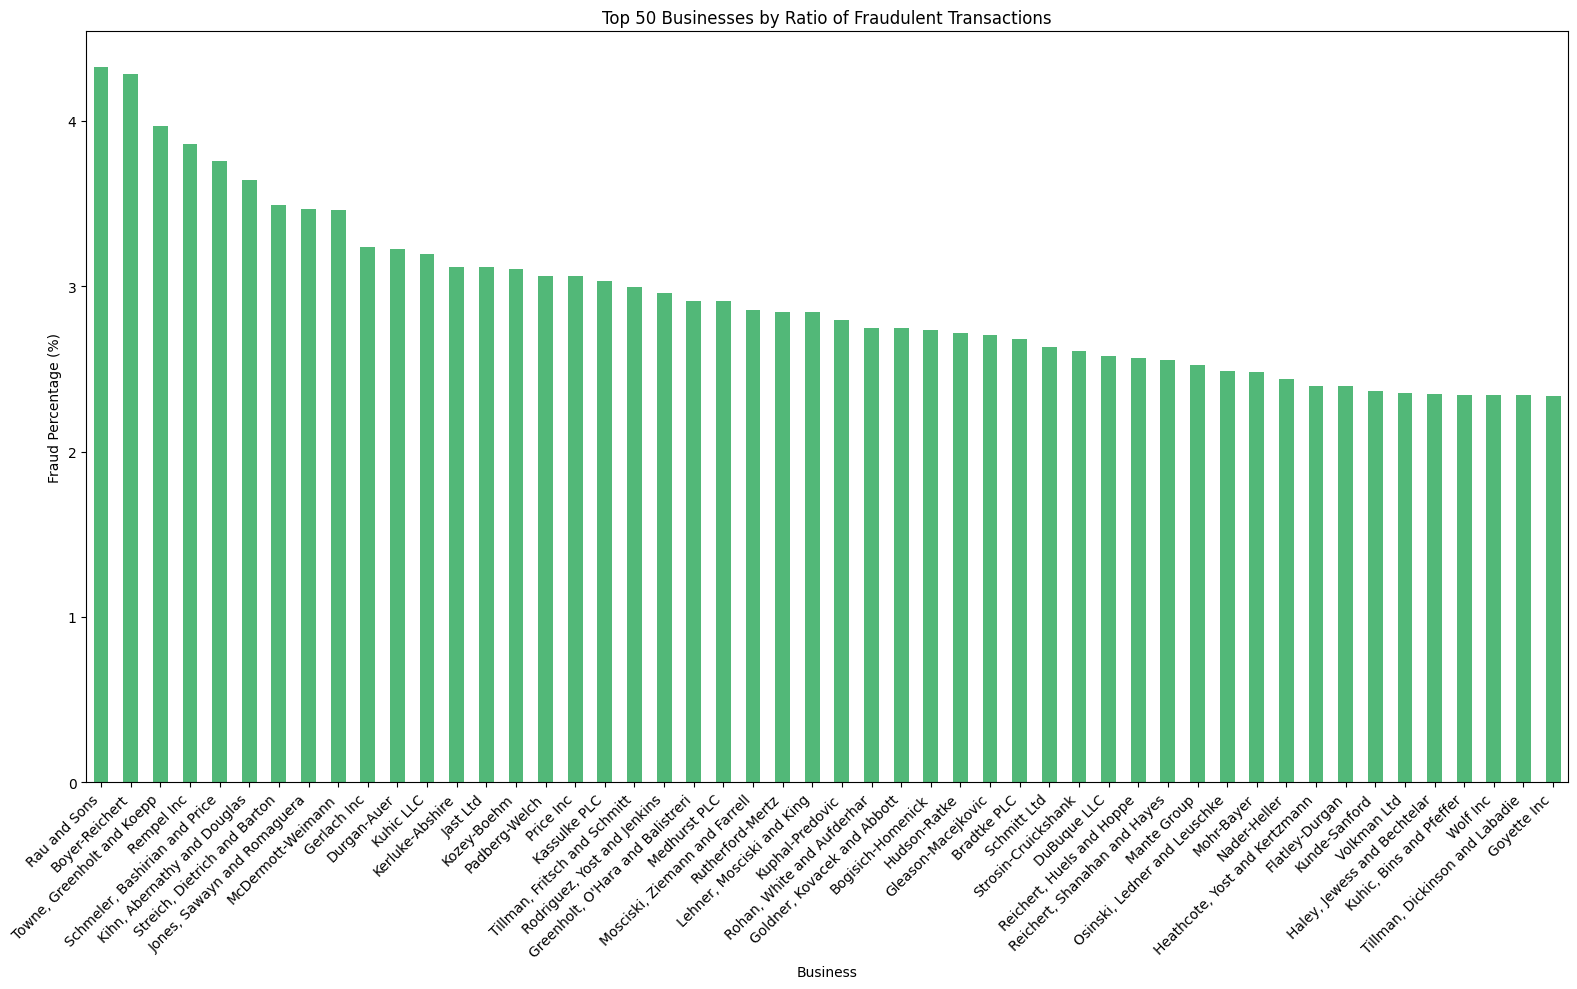

In [23]:
# Sort the businesses by fraud ratio and select the top 20
top_50_businesses = fraud_counts_by_business.sort_values('FraudRatio', ascending=False).head(50)

# Plot the top 20 ratios
plt.figure(figsize=(16, 10))
top_50_businesses['FraudRatio'].plot(kind='bar', color='#52b878')
plt.title('Top 50 Businesses by Ratio of Fraudulent Transactions')
plt.xlabel('Business')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

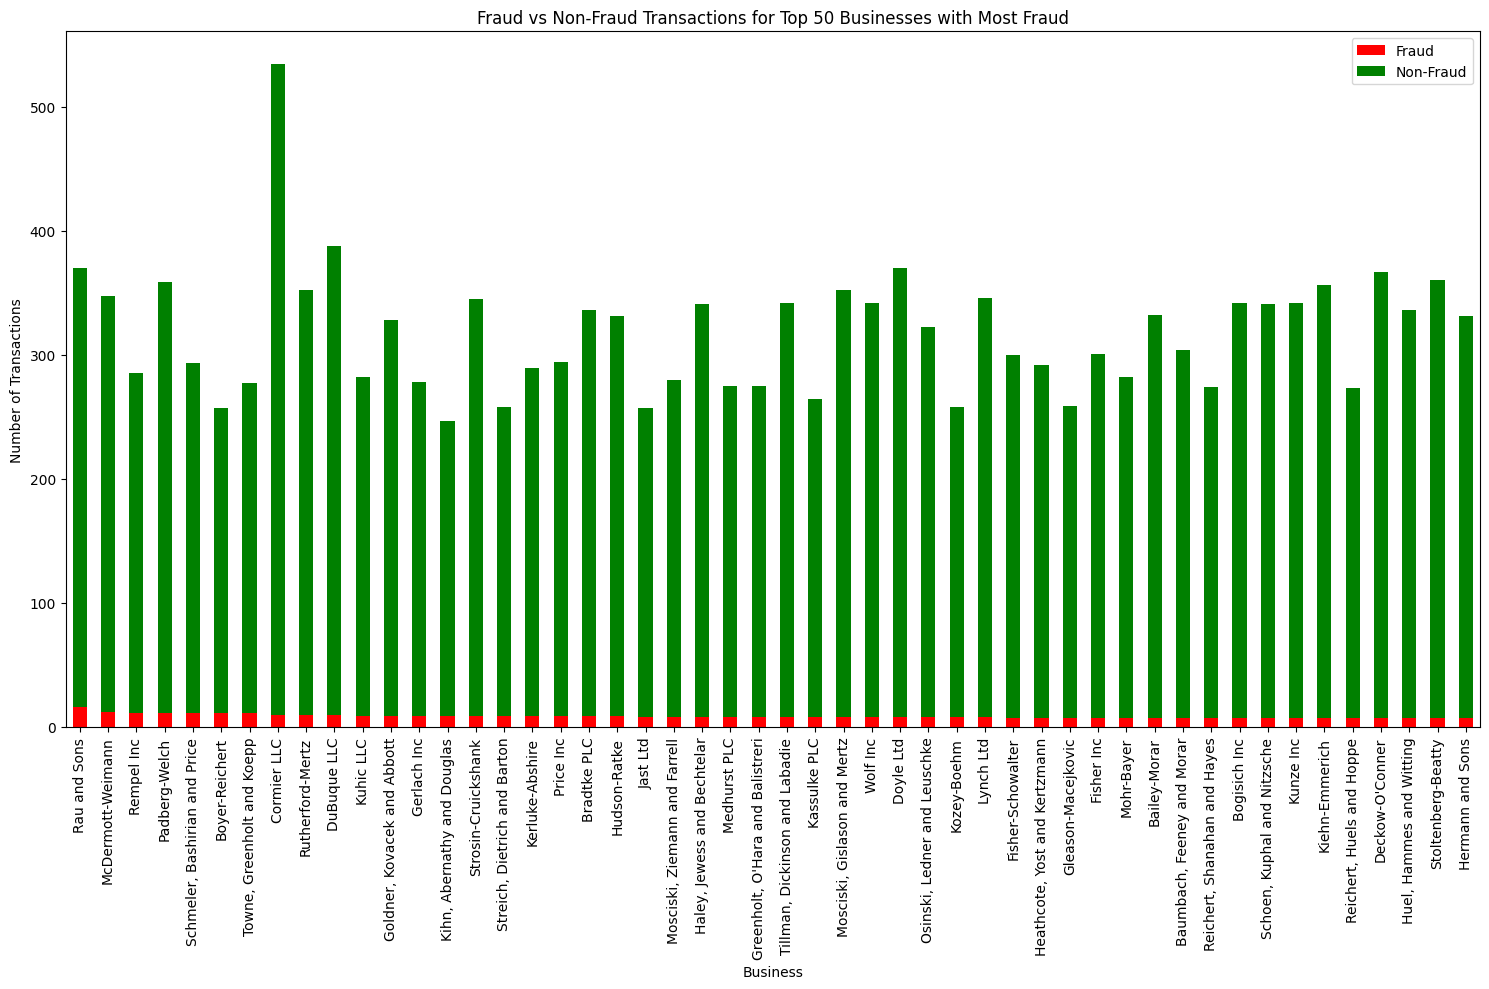

In [ ]:
transaction_counts_by_business = df.groupby(['business', 'isFraud']).size().unstack(fill_value=0)

# Calculate the total number of fraudulent transactions for each business
fraud_counts_by_business['TotalFraud'] = transaction_counts_by_business[1]

# Sort the businesses by the total number of fraudulent transactions and select the top 50
top_50_businesses_by_fraud = fraud_counts_by_business.sort_values('TotalFraud', ascending=False).head(50)

# Plot the counts of fraudulent and non-fraudulent transactions as stacked bars
top_50_businesses_by_fraud[[1, 0]].plot(kind='bar', stacked=True, figsize=(15, 10), color=['red', '#52b878'])
plt.title('Fraud vs Non-Fraud Transactions for Top 50 Businesses with Most Fraud')
plt.xlabel('Business')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.legend(['Fraud','Non-Fraud'])
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

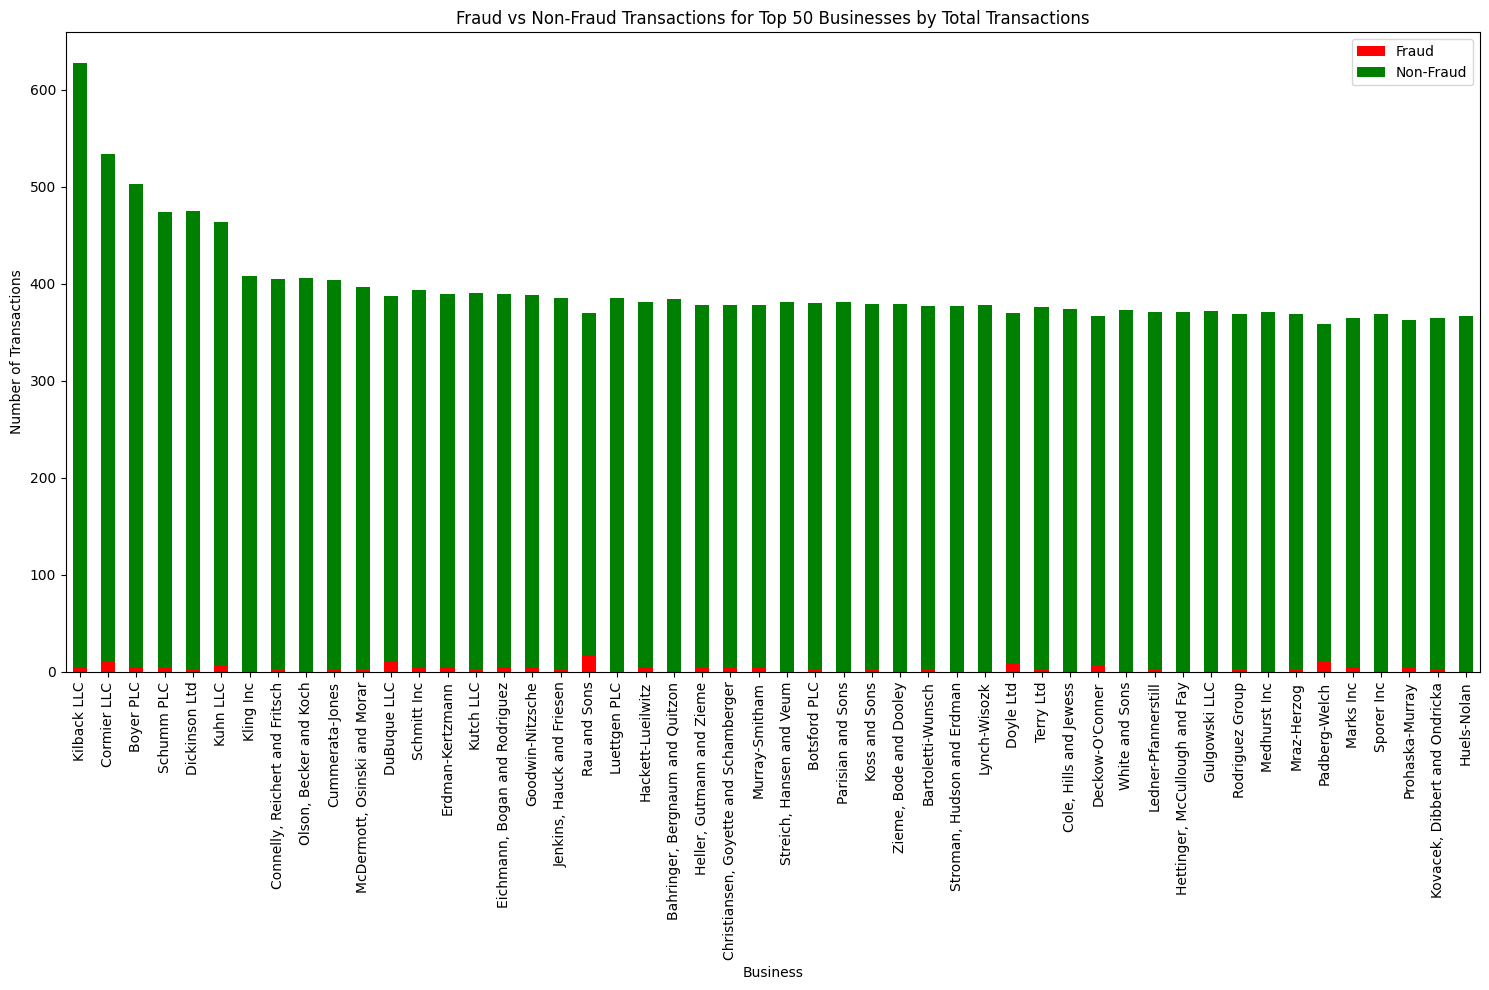

In [ ]:
# Calculate the total transactions for each business by summing fraud and non-fraud transactions
transaction_counts_by_business['TotalTransactions'] = transaction_counts_by_business.sum(axis=1)

# Sort the businesses by the total transactions and select the top 50
top_50_businesses_by_total_transactions = transaction_counts_by_business.sort_values('TotalTransactions', ascending=False).head(50)

# Plot the counts of fraudulent and non-fraudulent transactions as stacked bars for the top 50 businesses
top_50_businesses_by_total_transactions[[1, 0]].plot(kind='bar', stacked=True, figsize=(15, 10), color=['red', 'green'])
plt.title('Fraud vs Non-Fraud Transactions for Top 50 Businesses by Total Transactions')
plt.xlabel('Business')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=90)  # Rotate the x labels for better readability
plt.legend(['Fraud', 'Non-Fraud'])
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

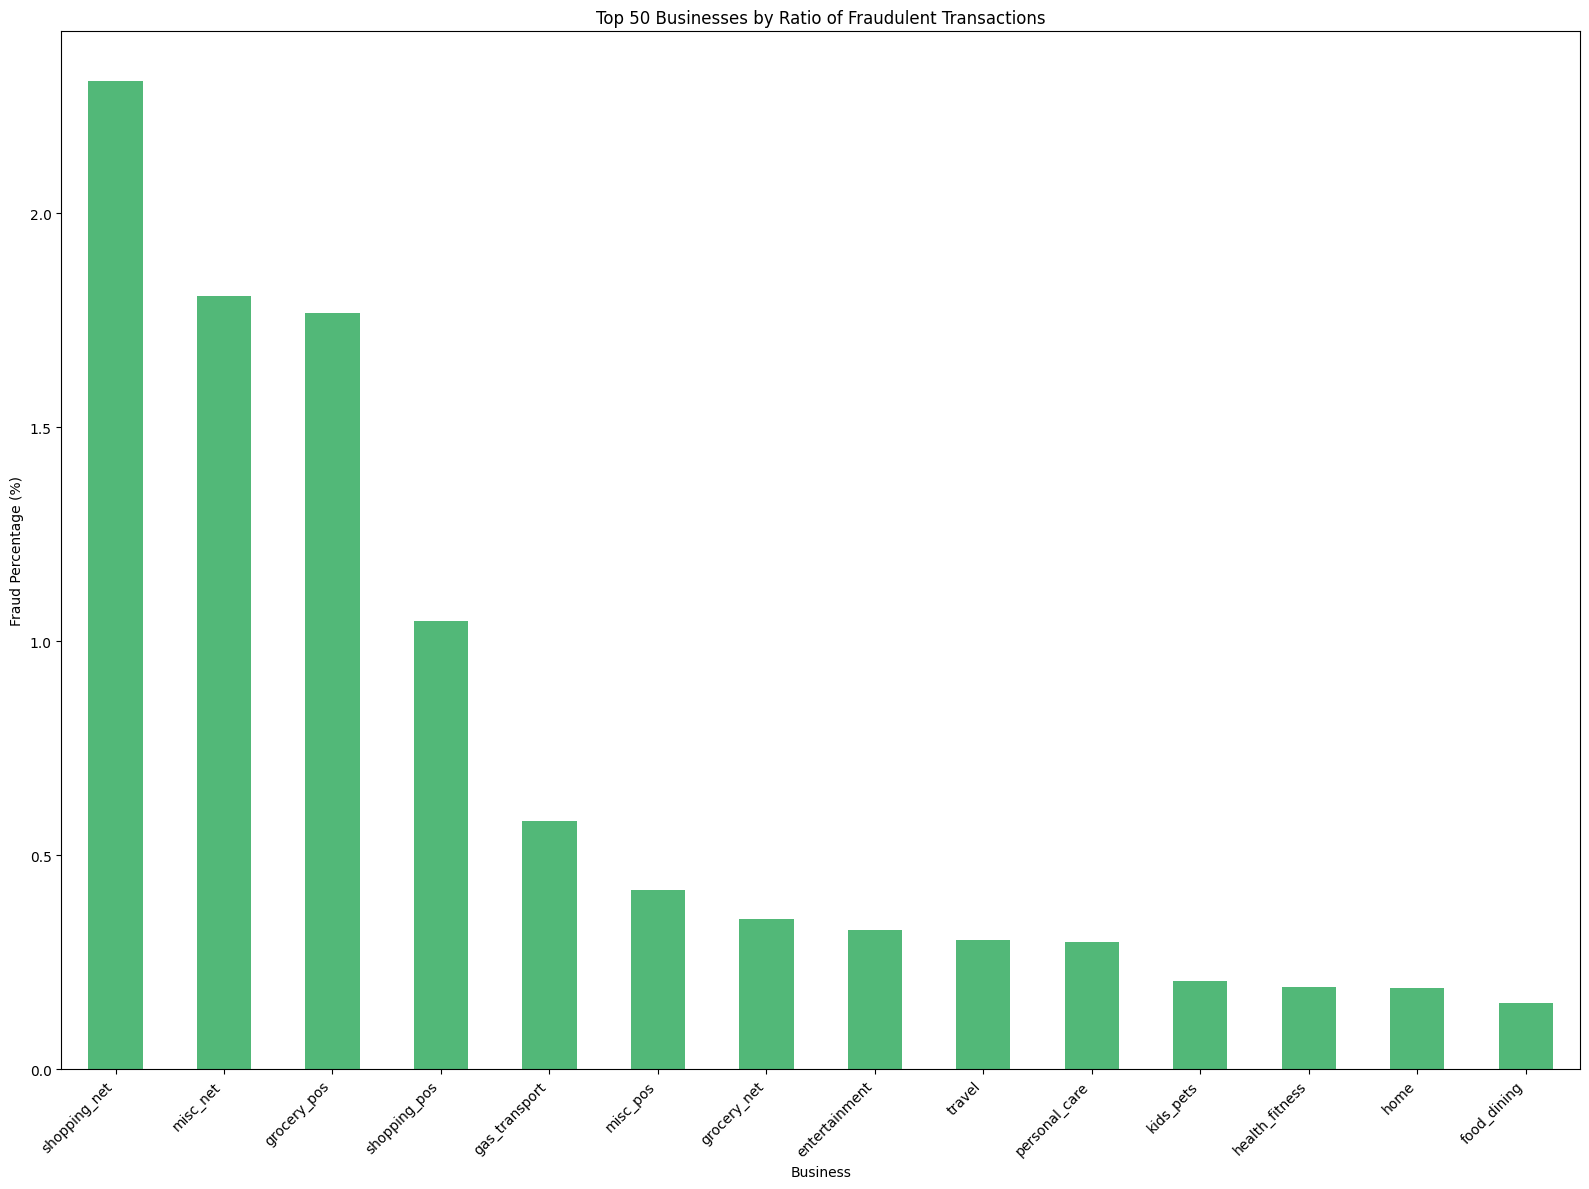

In [24]:
fraud_counts_by_category = df.groupby(['category', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each business
fraud_counts_by_category['FraudRatio'] = fraud_counts_by_category[1] / (fraud_counts_by_category[0] + fraud_counts_by_category[1]) * 100

# Sort the businesses by fraud ratio and select the top 20
top_50_categories = fraud_counts_by_category.sort_values('FraudRatio', ascending=False)

# Plot the top 20 ratios
plt.figure(figsize=(16, 12))
top_50_categories['FraudRatio'].plot(kind='bar', color='#52b878')
plt.title('Top 50 Businesses by Ratio of Fraudulent Transactions')
plt.xlabel('Category')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

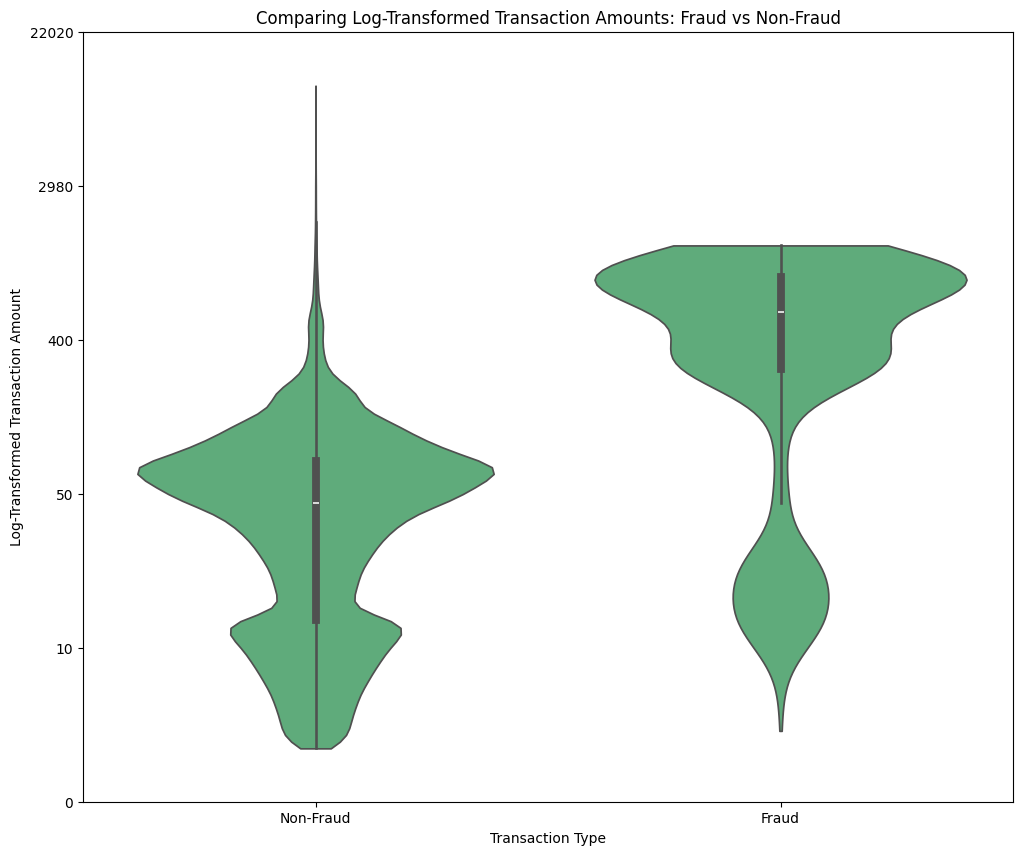

In [36]:
# Map isFraud to a more descriptive label
df['TransactionType'] = df['isFraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Use a log scale for the 'amount' to better handle outliers
df['LogAmount'] = np.log1p(df['amount'])  # log1p ensures that zero amounts are handled smoothly

# Create the violin plot with the log-transformed amounts
plt.figure(figsize=(12, 10))
sns.violinplot(x='TransactionType', y='LogAmount', data=df, cut=0, color='#52b878')
plt.title('Comparing Log-Transformed Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Log-Transformed Transaction Amount')
# If the original amount scale is preferred on the y-axis, you can adjust the labels accordingly
plt.yticks(ticks=np.arange(0, np.max(df['LogAmount'])+1, 2), labels=np.round(np.expm1(np.arange(0, np.max(df['LogAmount'])+1, 2)).astype(int), -1))
plt.show()

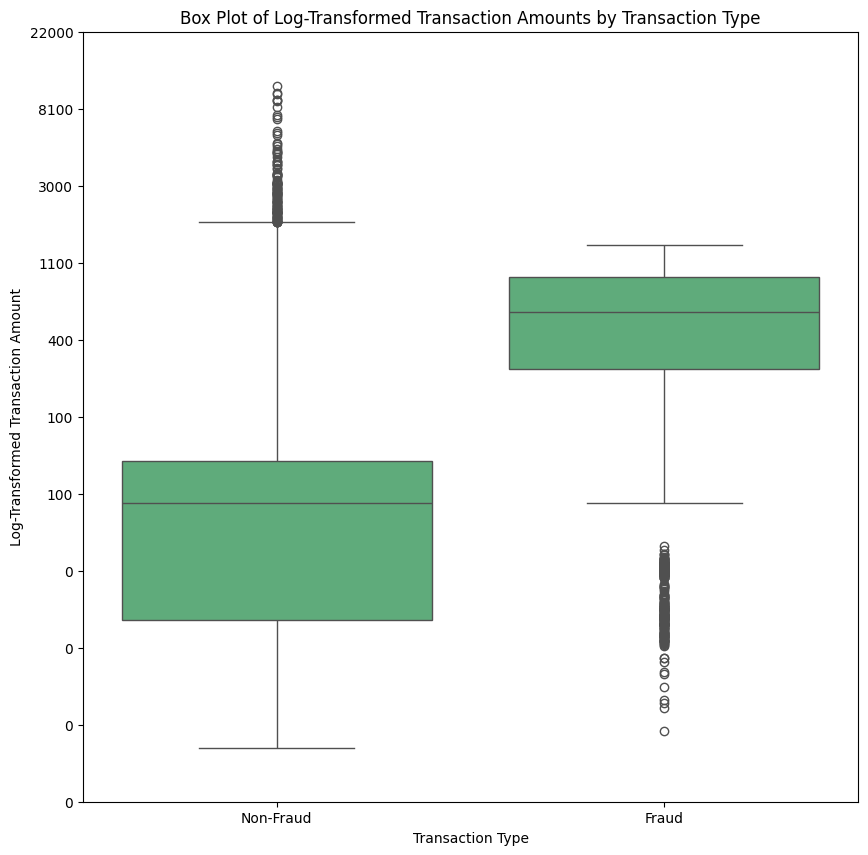

In [35]:
# Create the box plot with the log-transformed amounts
plt.figure(figsize=(10, 10))
sns.boxplot(x='TransactionType', y='LogAmount', data=df, color='#52b878')
plt.title('Box Plot of Log-Transformed Transaction Amounts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Log-Transformed Transaction Amount')

# Customize y-axis to show the original amount scale for better interpretation
plt.yticks(ticks=np.arange(0, np.max(df['LogAmount'])+1, 1), labels=np.round(np.expm1(np.arange(0, np.max(df['LogAmount'])+1, 1)).astype(int), -2))

plt.show()

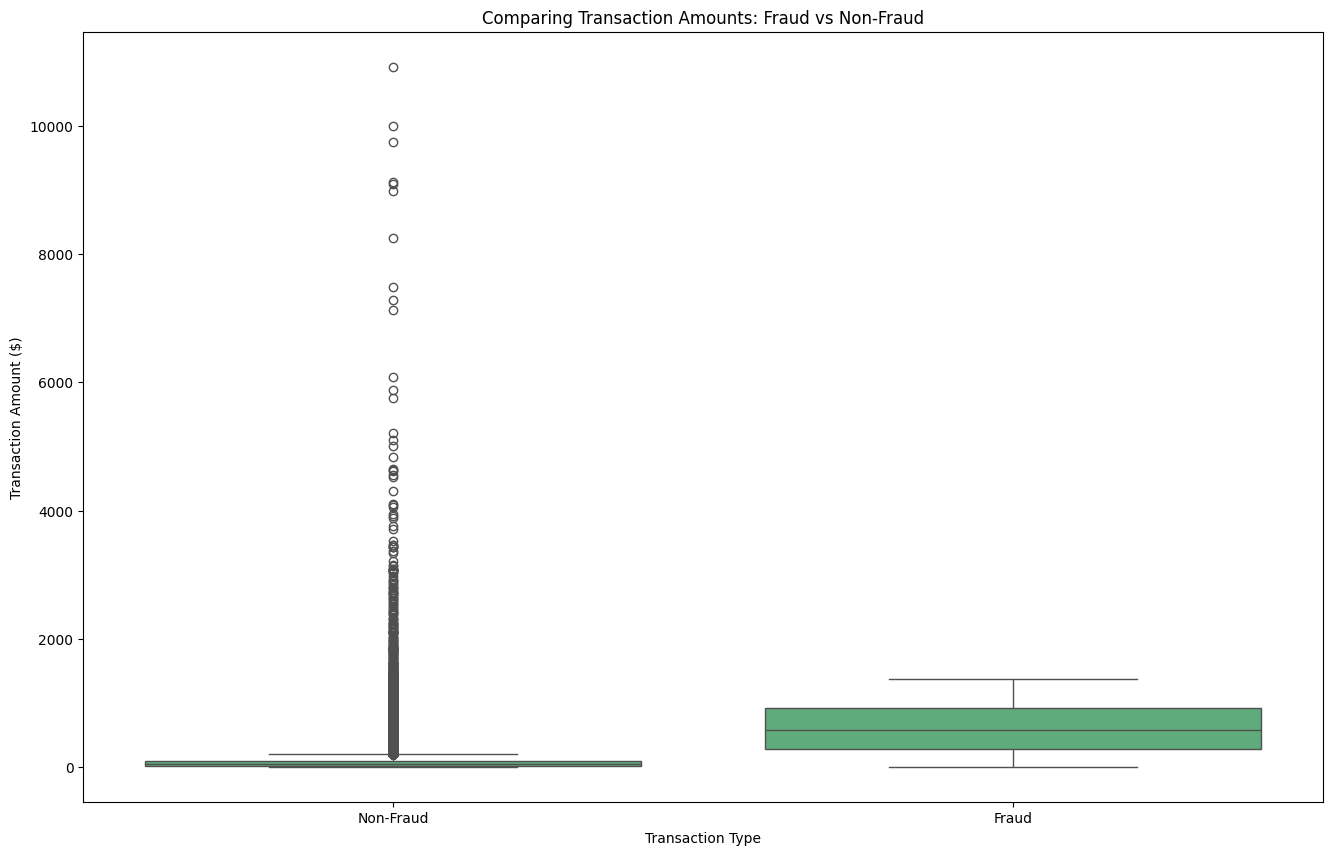

In [29]:
# Create a new column 'TransactionType' to label transactions as 'Fraud' or 'Non-Fraud'
df['TransactionType'] = df['isFraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Create the violin plot
plt.figure(figsize=(16, 10))
sns.boxplot(x='TransactionType', y='amount', data=df, color='#52b878')
plt.title('Comparing Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount ($)')
plt.show()

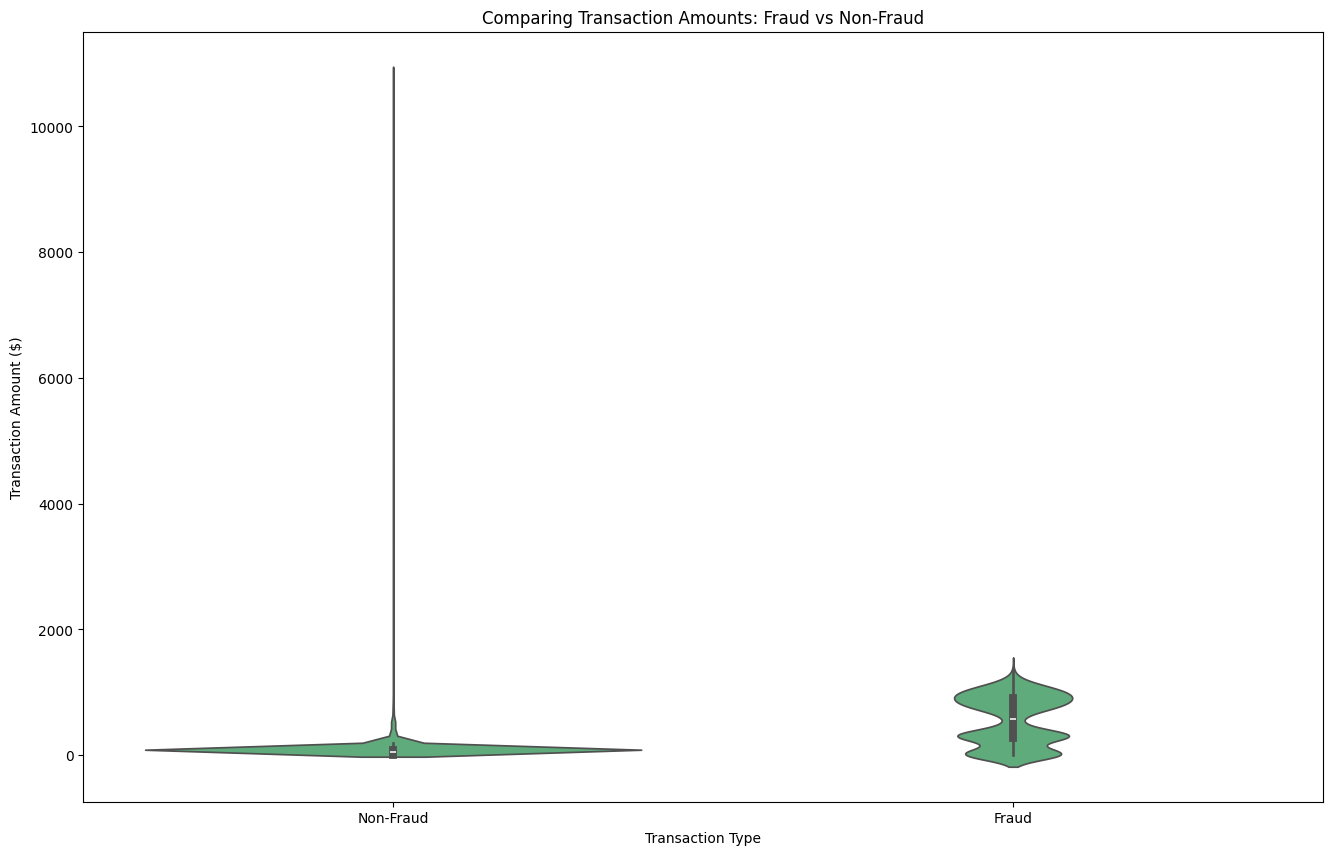

In [43]:
# Create a new column 'TransactionType' to label transactions as 'Fraud' or 'Non-Fraud'
df['TransactionType'] = df['isFraud'].map({0: 'Non-Fraud', 1: 'Fraud'})

# Create the violin plot
plt.figure(figsize=(16, 10))
sns.violinplot(x='TransactionType', y='amount', data=df, color='#52b878')
plt.title('Comparing Transaction Amounts: Fraud vs Non-Fraud')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount ($)')
plt.show()

In [34]:
# Separate the transaction amounts into fraud and non-fraud
fraud_amounts = df[df['isFraud'] == 1]['amount']
non_fraud_amounts = df[df['isFraud'] == 0]['amount']

# Calculate the IQR for both fraudulent and non-fraudulent transactions
Q1_fraud = fraud_amounts.quantile(0.25)
Q3_fraud = fraud_amounts.quantile(0.75)
IQR_fraud = Q3_fraud - Q1_fraud

Q1_non_fraud = non_fraud_amounts.quantile(0.25)
Q3_non_fraud = non_fraud_amounts.quantile(0.75)
IQR_non_fraud = Q3_non_fraud - Q1_non_fraud

Q1_fraud, Q3_fraud, Q1_non_fraud, Q3_non_fraud

(273.075, 909.77, 9.62, 82.66)

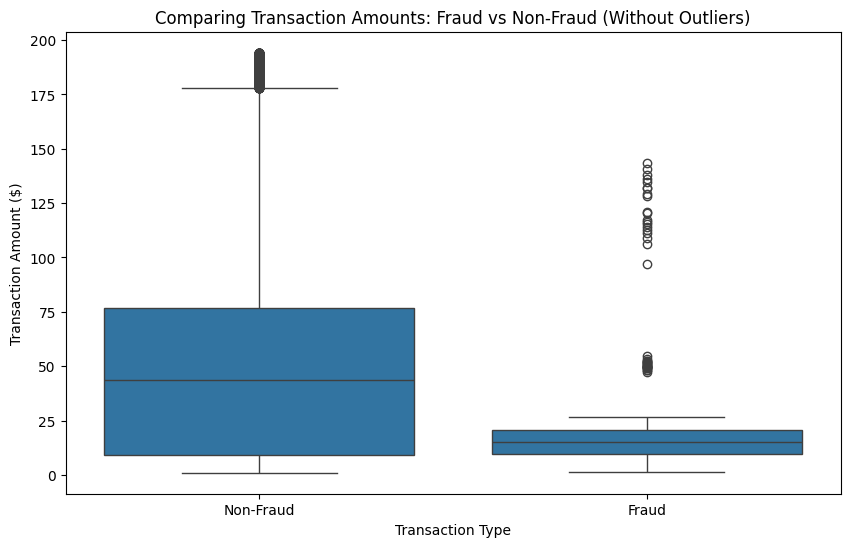

In [ ]:
Q1 = df['amount'].quantile(0.25)
Q3 = df['amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any values below (Q1 - 1.5 * IQR) or above (Q3 + 1.5 * IQR)
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['amount'] >= lower_bound) & (df['amount'] <= upper_bound)]

# Now df_filtered contains only the rows without outliers

# Proceed to create the box plot with df_filtered
plt.figure(figsize=(10, 6))
sns.boxplot(x='TransactionType', y='amount', data=df_filtered)
plt.title('Comparing Transaction Amounts: Fraud vs Non-Fraud (Without Outliers)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount ($)')
plt.show()

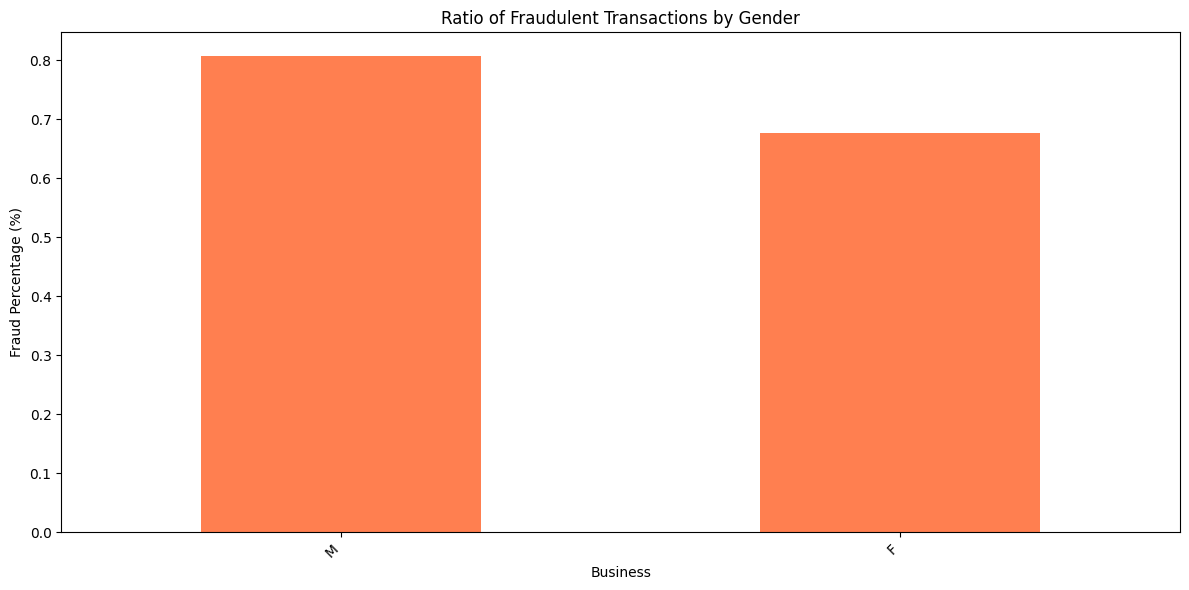

In [ ]:
fraud_counts_by_gender = df.groupby(['gender', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each business
fraud_counts_by_gender['FraudRatio'] = fraud_counts_by_gender[1] / (fraud_counts_by_gender[0] + fraud_counts_by_gender[1]) * 100

# Sort the businesses by fraud ratio and select the top 20
top_50_categories = fraud_counts_by_gender.sort_values('FraudRatio', ascending=False)

# Plot the top 20 ratios
plt.figure(figsize=(12, 6))
top_50_categories['FraudRatio'].plot(kind='bar', color='coral')
plt.title('Ratio of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

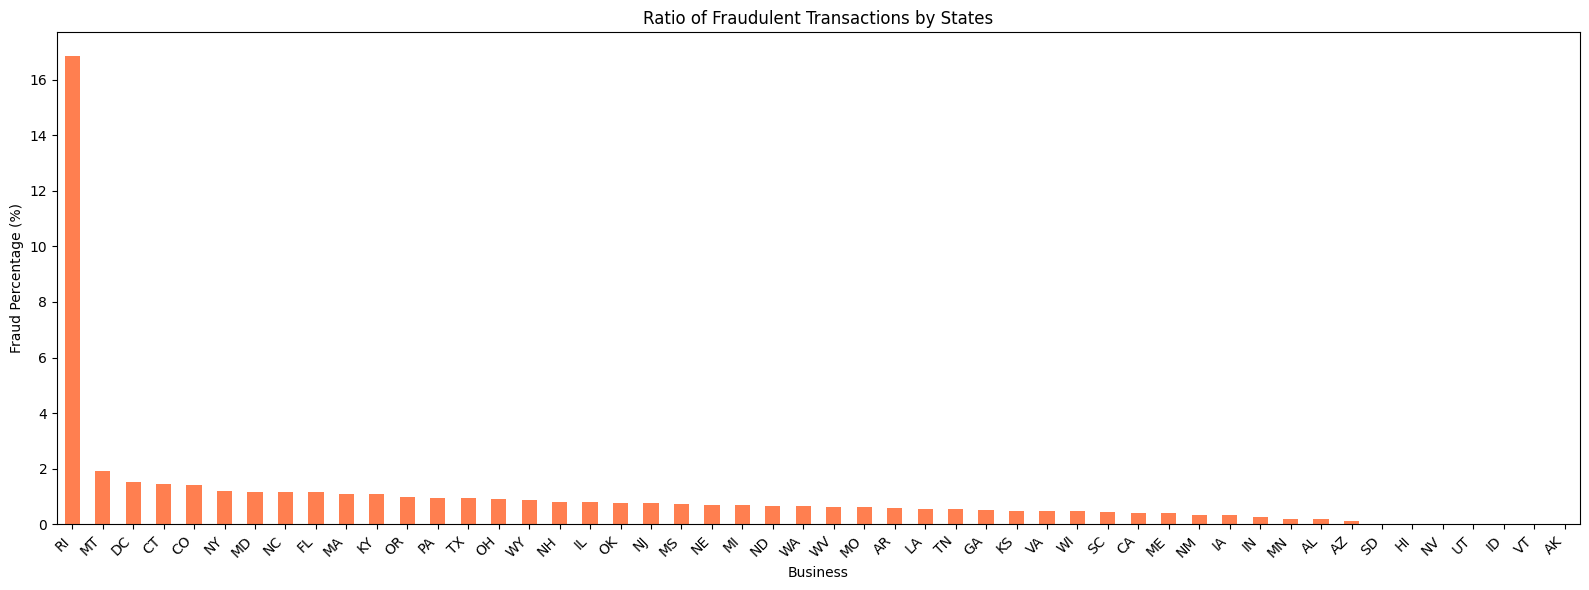

In [38]:
fraud_counts_by_state = df.groupby(['state', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each business
fraud_counts_by_state['FraudRatio'] = fraud_counts_by_state[1] / (fraud_counts_by_state[0] + fraud_counts_by_state[1]) * 100

# Sort the businesses by fraud ratio and select the top 20
top_50_categories = fraud_counts_by_state.sort_values('FraudRatio', ascending=False)

# Plot the top 20 ratios
plt.figure(figsize=(16, 6))
top_50_categories['FraudRatio'].plot(kind='bar', color='coral')
plt.title('Ratio of Fraudulent Transactions by States')
plt.xlabel('Business')
plt.ylabel('Fraud Percentage (%)')
plt.xticks(rotation=45, ha='right')  # Rotate the x labels for better readability
plt.tight_layout()  # Adjusts plot to ensure everything fits without overlapping
plt.show()

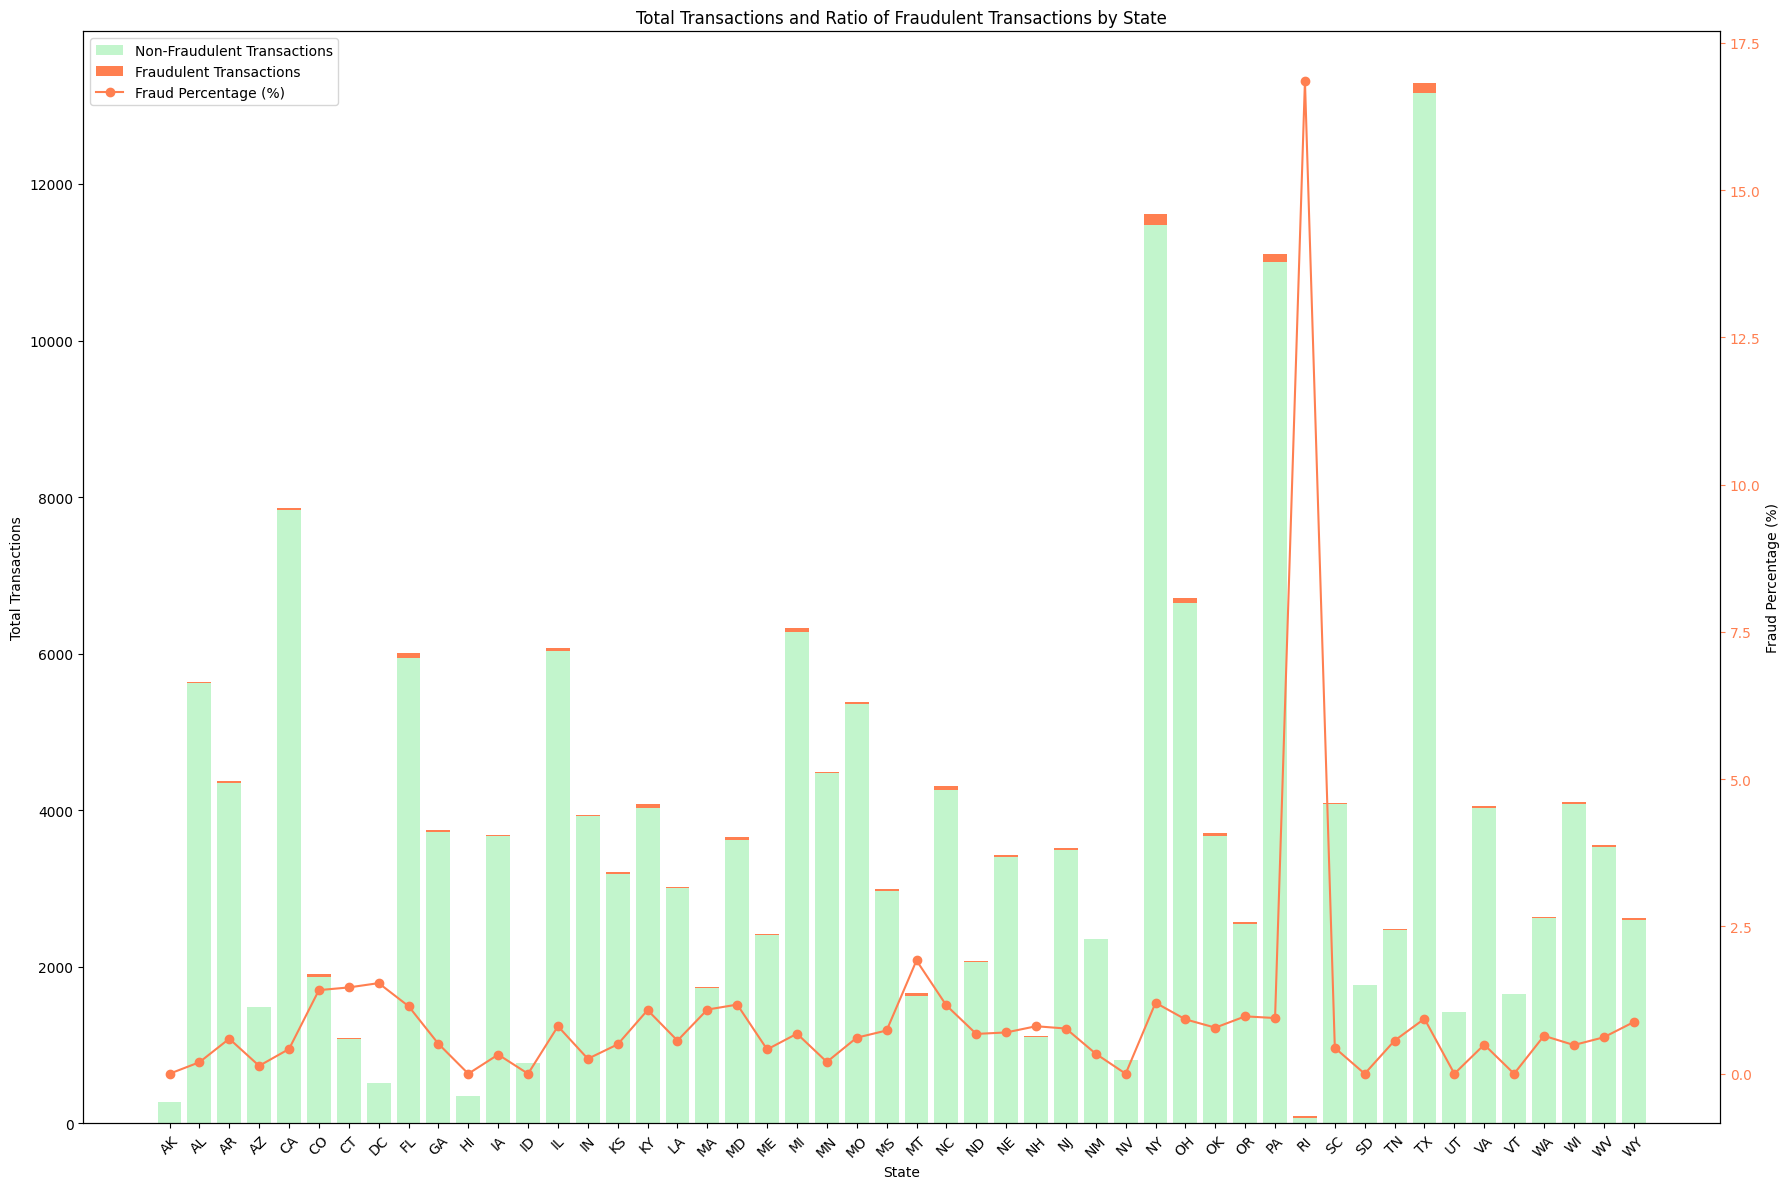

In [42]:

# Add a new column for total transactions
fraud_counts_by_state['TotalTransactions'] = fraud_counts_by_state[0] + fraud_counts_by_state[1]

# Plotting
fig, ax1 = plt.subplots(figsize=(18, 12))

# Create the bar plot for total transactions
ax1.bar(fraud_counts_by_state.index, fraud_counts_by_state[0], label='Non-Fraudulent Transactions', color='#c2f5cc')
ax1.bar(fraud_counts_by_state.index, fraud_counts_by_state[1], bottom=fraud_counts_by_state[0], label='Fraudulent Transactions', color='coral')

ax1.set_xlabel('State')
ax1.set_ylabel('Total Transactions')
ax1.tick_params(axis='x', rotation=45)

# Create a secondary y-axis for the fraud ratio
ax2 = ax1.twinx()
ax2.plot(fraud_counts_by_state.index, fraud_counts_by_state['FraudRatio'], color='coral', label='Fraud Percentage (%)', marker='o')
ax2.set_ylabel('Fraud Percentage (%)')

# Make the y-axis label, ticks and tick labels match the line color.
ax2.tick_params(axis='y', colors='coral')

# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Transactions and Ratio of Fraudulent Transactions by State')
plt.tight_layout()
plt.show()

/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_64316/2116293806.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_by_age = df.groupby(['AgeGroup', 'isFraud']).size().unstack(fill_value=0)


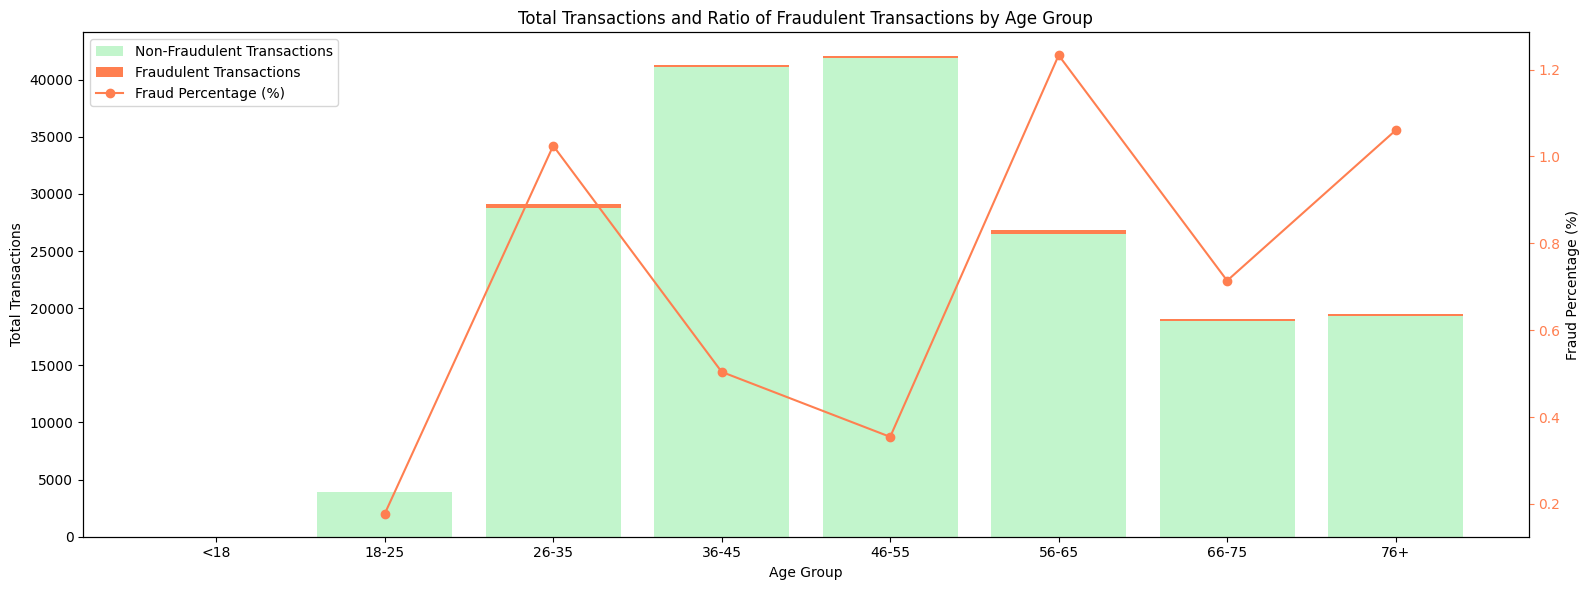

In [46]:
from datetime import datetime

# Convert 'dateOfBirth' to datetime if it's not already
df['dateOfBirth'] = pd.to_datetime(df['dateOfBirth'])

# Calculate age
current_year = datetime.now().year
df['Age'] = current_year - df['dateOfBirth'].dt.year

# Define age bins and labels for the categories
bins = [0, 18, 25, 35, 45, 55, 65, 75, 100]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and 'isFraud'
fraud_counts_by_age = df.groupby(['AgeGroup', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each age group (optional)
fraud_counts_by_age['FraudRatio'] = fraud_counts_by_age[1] / (fraud_counts_by_age[0] + fraud_counts_by_age[1]) * 100

# Add a new column for total transactions
fraud_counts_by_age['TotalTransactions'] = fraud_counts_by_age[0] + fraud_counts_by_age[1]

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Create the bar plot for total transactions by age group
ax1.bar(fraud_counts_by_age.index, fraud_counts_by_age[0], label='Non-Fraudulent Transactions', color='#c2f5cc')
ax1.bar(fraud_counts_by_age.index, fraud_counts_by_age[1], bottom=fraud_counts_by_age[0], label='Fraudulent Transactions', color='coral')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Transactions')

# Secondary y-axis for the fraud ratio
ax2 = ax1.twinx()
ax2.plot(fraud_counts_by_age.index, fraud_counts_by_age['FraudRatio'], color='coral', label='Fraud Percentage (%)', marker='o')
ax2.set_ylabel('Fraud Percentage (%)')
ax2.tick_params(axis='y', colors='coral')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Transactions and Ratio of Fraudulent Transactions by Age Group')
plt.tight_layout()
plt.show()


/var/folders/q4/w5wd298x2j51mk7bkv38kmt80000gn/T/ipykernel_64316/2584874793.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_counts_by_age = df.groupby(['AgeGroup', 'isFraud']).size().unstack(fill_value=0)


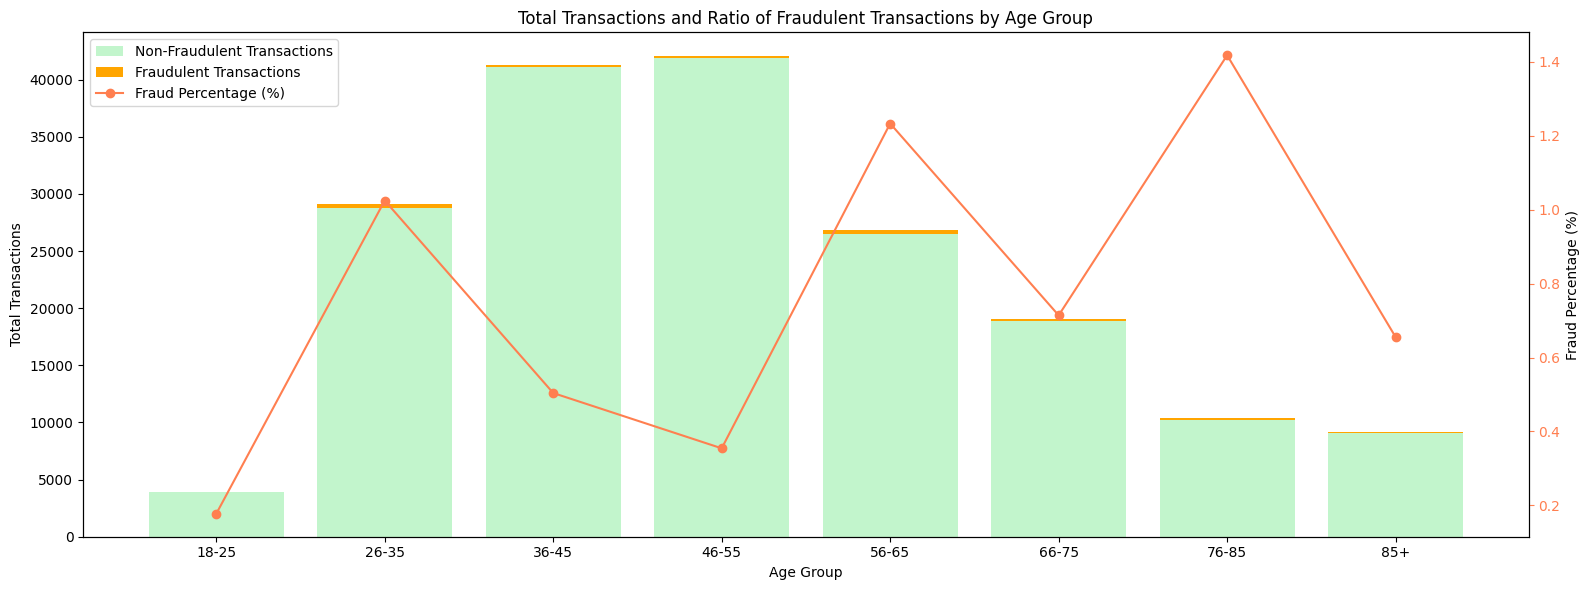

In [45]:
bins = [ 18, 25, 35, 45, 55, 65, 75, 85, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '85+']

df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Group by 'AgeGroup' and 'isFraud'
fraud_counts_by_age = df.groupby(['AgeGroup', 'isFraud']).size().unstack(fill_value=0)

# Calculate the ratio of fraudulent transactions for each age group (optional)
fraud_counts_by_age['FraudRatio'] = fraud_counts_by_age[1] / (fraud_counts_by_age[0] + fraud_counts_by_age[1]) * 100

# Add a new column for total transactions
fraud_counts_by_age['TotalTransactions'] = fraud_counts_by_age[0] + fraud_counts_by_age[1]

# Plotting
fig, ax1 = plt.subplots(figsize=(16, 6))

# Create the bar plot for total transactions by age group
ax1.bar(fraud_counts_by_age.index, fraud_counts_by_age[0], label='Non-Fraudulent Transactions', color='#c2f5cc')
ax1.bar(fraud_counts_by_age.index, fraud_counts_by_age[1], bottom=fraud_counts_by_age[0], label='Fraudulent Transactions', color='orange')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Total Transactions')

# Secondary y-axis for the fraud ratio
ax2 = ax1.twinx()
ax2.plot(fraud_counts_by_age.index, fraud_counts_by_age['FraudRatio'], color='coral', label='Fraud Percentage (%)', marker='o')
ax2.set_ylabel('Fraud Percentage (%)')
ax2.tick_params(axis='y', colors='coral')

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Total Transactions and Ratio of Fraudulent Transactions by Age Group')
plt.tight_layout()
plt.show()


In [ ]:
df2 = re